In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Birth.csv")

In [3]:
data

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,0,19,182,2,0,0,0,1,0,2523
1,0,33,155,3,0,0,0,0,3,2551
2,0,20,105,1,1,0,0,0,1,2557
3,0,21,108,1,1,0,0,1,2,2594
4,0,18,107,1,1,0,0,1,0,2600
...,...,...,...,...,...,...,...,...,...,...
184,1,28,95,1,1,0,0,0,2,2466
185,1,14,100,3,0,0,0,0,2,2495
186,1,23,94,3,1,0,0,0,0,2495
187,1,17,142,2,0,0,1,0,0,2495


In [4]:
age = data['age']

In [5]:
from sklearn.linear_model import LinearRegression

In [8]:
birthwt = data["bwt"]

In [9]:
def covariance(dataset1,dataset2):
    mean1 = np.mean(dataset1)
    mean2 = np.mean(dataset2)
    return np.sum(np.multiply(dataset1-mean1,dataset2-mean2))/len(dataset1)

In [13]:
def correlation(dataset1,dataset2):
    cov =covariance(dataset1,dataset2)
    sd1 = np.std(dataset1)
    sd2 = np.std(dataset2)
    return cov/(sd1*sd2)

In [14]:
correlation(age,birthwt)

0.0903178136685326

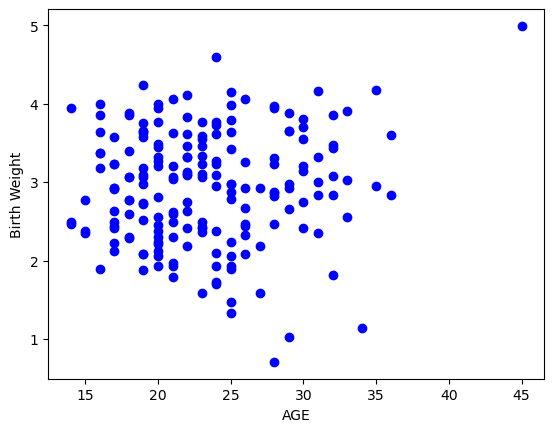

In [15]:
plt.scatter(age, birthwt/1000, c='blue')
plt.xlabel("AGE")
plt.ylabel("Birth Weight")
plt.show()

In [16]:
lr = LinearRegression()

In [17]:
age = age.reshape(-1,1)
lr.fit(age,birthwt)

LinearRegression()

In [18]:
y = lr.predict(age)
print("Coefficients :",lr.coef_[0])
print("intercept :",lr.intercept_)

Coefficients : 12.429712027714624
intercept : 2655.7444697051715


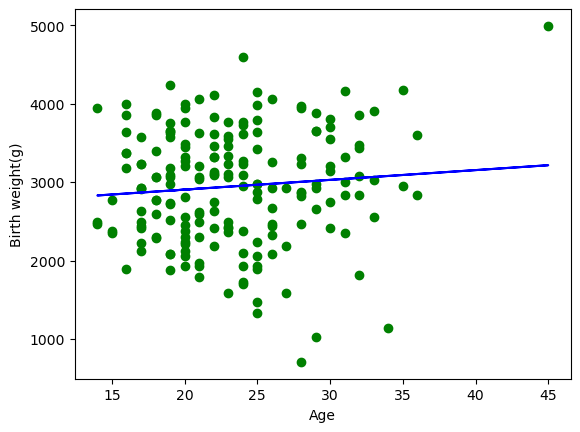

In [20]:
plt.plot(age,y,color= "blue")
plt.scatter(age,birthwt,c= "green")
plt.xlabel("Age")
plt.ylabel("Birth weight(g)")
plt.show()

In [21]:
motherwt = data['lwt']
#grams to pounds
birthwt = birthwt/454

In [22]:
correlation(motherwt, birthwt)

0.18573328444909923

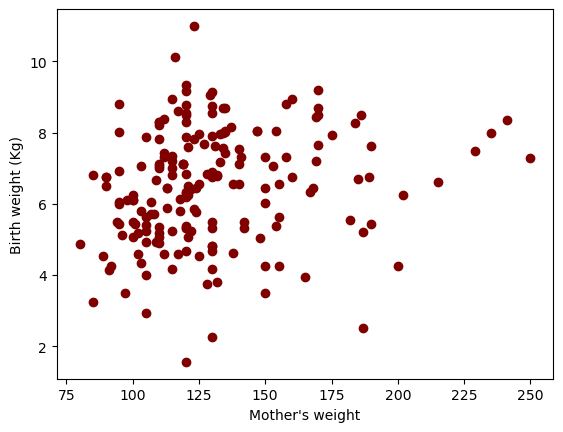

In [24]:
plt.xlabel("Mother's weight")
plt.ylabel("Birth weight (Kg)")
plt.scatter(motherwt,birthwt,c = "maroon")

In [26]:
motherwt = motherwt.to_numpy()
motherwt =motherwt.reshape(-1,1)
lr.fit(motherwt,birthwt)

LinearRegression()

In [27]:
z = lr.predict(motherwt)
print("Coefficients :",lr.coef_[0])
print("intercept :",lr.intercept_)

Coefficients : 0.009755743626323138
intercept : 5.219435061396471


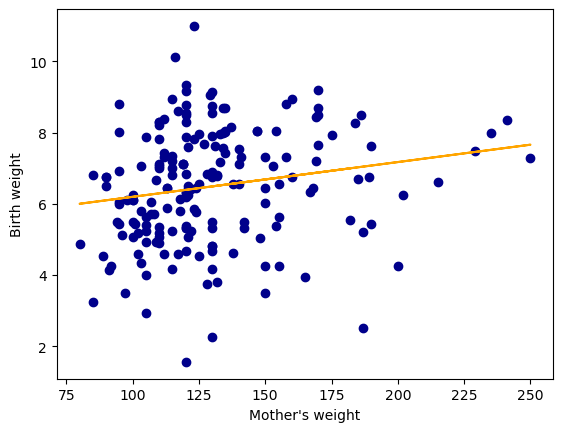

In [28]:
plt.plot(motherwt,z,c="orange")
plt.scatter(motherwt,birthwt,c ="darkblue")
plt.xlabel("Mother's weight")
plt.ylabel("Birth weight")
plt.show()